### Forecasting with Holt-Winters Method

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


#### Train-Test Split

In [4]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

#### Model Fitting

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
# seasonal_periods indicates how often a season is occuring 
# In our dataset it is annual
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                   trend='mul', seasonal='mul',
                                   seasonal_periods=12).fit()

#### Evaluating on Test set

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
# 36 is the forecast frequencey (the number of months we forecast)
test_pred = fitted_model.forecast(36).rename('HW Forecast')

In [11]:
test_pred

1958-02-01    331.649486
1958-03-01    388.989620
1958-04-01    380.125229
1958-05-01    388.290918
1958-06-01    453.379217
1958-07-01    502.248555
1958-08-01    490.986945
1958-09-01    424.051079
1958-10-01    365.391637
1958-11-01    318.392247
1958-12-01    360.320760
1959-01-01    369.905595
1959-02-01    359.903246
1959-03-01    422.128280
1959-04-01    412.508717
1959-05-01    421.370055
1959-06-01    492.003332
1959-07-01    545.035928
1959-08-01    532.814924
1959-09-01    460.176682
1959-10-01    396.519947
1959-11-01    345.516602
1959-12-01    391.017074
1960-01-01    401.418456
1960-02-01    390.563991
1960-03-01    458.090077
1960-04-01    447.651008
1960-05-01    457.267257
1960-06-01    533.917899
1960-07-01    591.468428
1960-08-01    578.206296
1960-09-01    499.379885
1960-10-01    430.300128
1960-11-01    374.951725
1960-12-01    424.328456
1961-01-01    435.615950
Freq: MS, Name: HW Forecast, dtype: float64

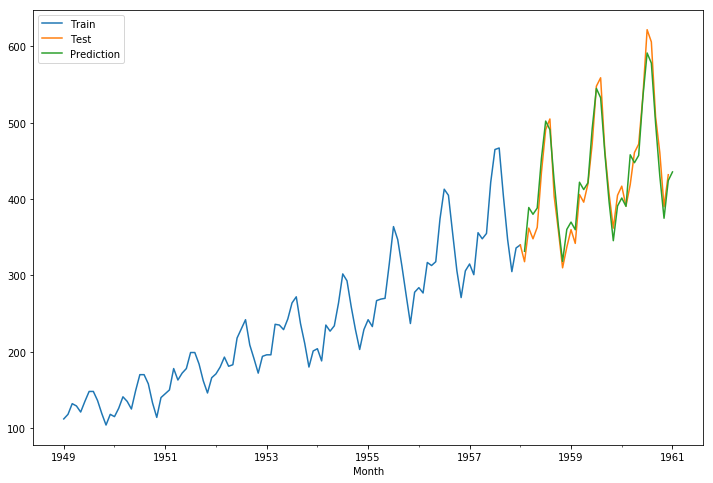

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='Train', figsize=(12, 8))
test_data['Thousands of Passengers'].plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Prediction')

#### Evaluation Metrics

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
mean_absolute_error(test_data, test_pred)

46.30290453876919

In [15]:
mean_squared_error(test_data, test_pred)

3075.328464707026

In [16]:
np.sqrt(mean_squared_error(test_data, test_pred))

55.45564411948549

In [17]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [18]:
### Our rmse is within bounds of the std on the test set

#### Forecast into Future

In [19]:
# After we are satisfied with the performance on the test set
# we fit the model again, this time on the whole dataset and 
# forecast the future

final_model = ExponentialSmoothing(df['Thousands of Passengers'],
                                  trend='mul', seasonal='mul',
                                  seasonal_periods=12).fit()

In [20]:
forecast_predictions = final_model.forecast(36)

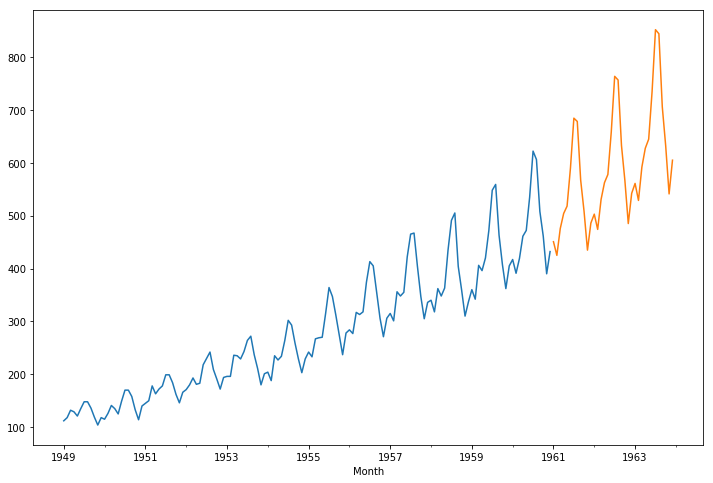

In [21]:
df['Thousands of Passengers'].plot(figsize=(12, 8))
forecast_predictions.plot();